In [1]:
import tensorflow as tf 
import keras
import numpy as np

In [2]:
model = keras.Sequential([
    keras.layers.Dense(units=1,input_shape=[1])])
model.compile(optimizer='sgd',loss='mean_squared_error')
xs=np.arange(-1,10)
ys=np.arange(-3,18,2)
model.fit(xs,ys,verbose=False,epochs=500);
print(model.predict([10.0]))

1/1 [==============================] - 0s 130ms/step
[[18.981052]]


In [89]:
(train_images,trian_labels),(test_images,test_labels) =keras.datasets.fashion_mnist.load_data()

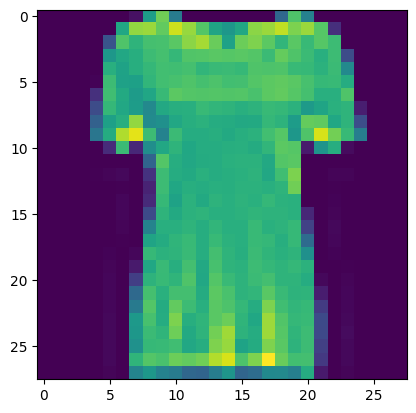

In [39]:
import matplotlib.pyplot as plt

plt.imshow(test_images[10]);

In [95]:
model=keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                        keras.layers.Dense(128,activation=tf.nn.relu),
                        keras.layers.Dense(10,activation=tf.nn.softmax)
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(train_images,trian_labels,epochs=5)
score=model.evaluate(test_images,test_labels)
print(score)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0025 - accuracy: 0.1000
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5806e-06 - accuracy: 0.1000
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 3.8458e-07 - accuracy: 0.1000
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3087e-07 - accuracy: 0.1000
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 79.2984 - accuracy: 0.1000
[79.29844665527344, 0.10000000149011612]


1/1 [==============================] - 0s 36ms/step


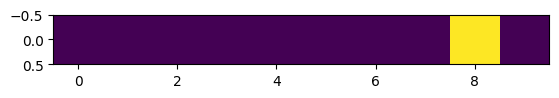

In [77]:
plt.imshow(model.predict(test_images[69]));

### Trying the convoloution

In [106]:
import tensorflow as tf

mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images / 255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(training_images, training_labels, epochs=5)
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print ('Test loss: {}, Test accuracy: {}'.format(test_loss, test_accuracy*100))

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_14 (Flatten)        (None, 800)               0         
                                                                 
 dense_29 (Dense)            (None, 128)             

1/1 [==============================] - 0s 33ms/step


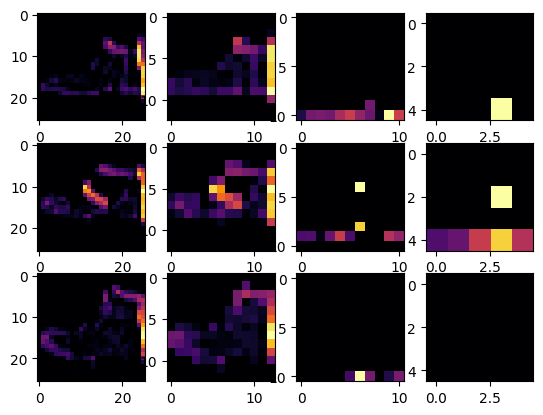

In [105]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 6
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)